In [1]:
# the usual imports
import numpy as np
import matplotlib.pyplot as plt
exp = np.exp
sin = np.sin
cos = np.cos
from icecream import ic

# Set up matplotlib
%matplotlib inline
# set default figure size
plt.rcParams['figure.figsize'] = [4, 4]
# set tick label size 
plt.rcParams.update({'font.size': 10})
# set x any y label size and title size
plt.rcParams.update({'axes.labelsize': 15})
plt.rcParams.update({'axes.titlesize': 15})
# add grid by default
plt.rcParams['axes.grid'] = True
# set legend size to 10
plt.rcParams.update({'legend.fontsize': 10})


In [2]:
# This is a path that for 0 <= t <= 2*pi traces out the outline of a cat.
# Source: https://www.geogebra.org/m/pH8wD3rW
 
cat_path = lambda t:  np.array([-(721 *sin(t))/4+196/3 *sin(2 *t)-86/3 *sin(3 *t)-131/2 *sin(4 *t)+477/14 *sin(5 *t)+27 *sin(6 *t)-\
     29/2 *sin(7 *t)+68/5 *sin(8 *t)+1/10 *sin(9 *t)+23/4 *sin(10 *t)-19/2 *sin(12 *t)-85/21 *sin(13 *t)+\
     2/3 *sin(14 *t)+27/5 *sin(15 *t)+7/4 *sin(16 *t)+17/9 *sin(17 *t)-4 *sin(18 *t)-1/2 *sin(19 *t)+\
     1/6 *sin(20 *t)+6/7 *sin(21 *t)-1/8 *sin(22 *t)+1/3 *sin(23 *t)+3/2 *sin(24 *t)+13/5 *sin(25 *t)+\
     sin(26 *t)-2 *sin(27 *t)+3/5 *sin(28 *t)-1/5 *sin(29 *t)+1/5 *sin(30 *t)+(2337 *cos(t))/8-\
     43/5 *cos(2 *t)+322/5 *cos(3 *t)-117/5 *cos(4 *t)-26/5 *cos(5 *t)-23/3 *cos(6 *t)+143/4 *cos(7 *t)-\
     11/4 *cos(8 *t)-31/3 *cos(9 *t)-13/4 *cos(10 *t)-9/2 *cos(11 *t)+41/20 *cos(12 *t)+8 *cos(13 *t)+\
     2/3 *cos(14 *t)+6 *cos(15 *t)+17/4 *cos(16 *t)-3/2 *cos(17 *t)-29/10 *cos(18 *t)+11/6 *cos(19 *t)+\
     12/5 *cos(20 *t)+3/2 *cos(21 *t)+11/12 *cos(22 *t)-4/5 *cos(23 *t)+cos(24 *t)+17/8 *cos(25 *t)-\
     7/2 *cos(26 *t)-5/6 *cos(27 *t)-11/10 *cos(28 *t)+1/2 *cos(29 *t)-1/5 *cos(30 *t), -(637 *sin(t))/2-\
     188/5 *sin(2 *t)-11/7 *sin(3 *t)-12/5 *sin(4 *t)+11/3 *sin(5 *t)-37/4 *sin(6 *t)+8/3 *sin(7 *t)+\
     65/6 *sin(8 *t)-32/5 *sin(9 *t)-41/4 *sin(10 *t)-38/3 *sin(11 *t)-47/8 *sin(12 *t)+5/4 *sin(13 *t)-\
     41/7 *sin(14 *t)-7/3 *sin(15 *t)-13/7 *sin(16 *t)+17/4 *sin(17 *t)-9/4 *sin(18 *t)+8/9 *sin(19 *t)+\
     3/5 *sin(20 *t)-2/5 *sin(21 *t)+4/3 *sin(22 *t)+1/3 *sin(23 *t)+3/5 *sin(24 *t)-3/5 *sin(25 *t)+\
     6/5 *sin(26 *t)-1/5 *sin(27 *t)+10/9 *sin(28 *t)+1/3 *sin(29 *t)-3/4 *sin(30 *t)-(125 *cos(t))/2-\
     521/9 *cos(2 *t)-359/3 *cos(3 *t)+47/3 *cos(4 *t)-33/2 *cos(5 *t)-5/4 *cos(6 *t)+31/8 *cos(7 *t)+\
     9/10 *cos(8 *t)-119/4 *cos(9 *t)-17/2 *cos(10 *t)+22/3 *cos(11 *t)+15/4 *cos(12 *t)-5/2 *cos(13 *t)+\
     19/6 *cos(14 *t)+7/4 *cos(15 *t)+31/4 *cos(16 *t)-cos(17 *t)+11/10 *cos(18 *t)-2/3 *cos(19 *t)+\
     13/3 *cos(20 *t)-5/4 *cos(21 *t)+2/3 *cos(22 *t)+1/4 *cos(23 *t)+5/6 *cos(24 *t)+3/4 *cos(26 *t)-\
     1/2 *cos(27 *t)-1/10 *cos(28 *t)-1/3 *cos(29 *t)-1/19 *cos(30 *t)]) # 0 <= t <= 2 pi

In [3]:
# Define a range of t-values, and compute points on the curve defined by cat_path.
#
# Thus, the curve is represented by a MATRIX, where each COLUMN is a point in space.
t = np.linspace(0,2*np.pi, 500)
C = cat_path(t)
print(f'There are {C.shape[1]} points in R^{C.shape[0]} computed.')
print('Shape of C:', C.shape)


There are 500 points in R^2 computed.
Shape of C: (2, 500)


In [4]:
def plot_curve(curve, fig = None, window = 800, title = '', label = None):
    """ Plot a curve."""
    if fig is None:
        fig = plt.figure()
    x = curve[0,:]
    y = curve[1,:]
    plt.plot(x,y, label = label)
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.set_xlim(-window,window)
    ax.set_ylim(-window,window)
    ax.legend()
    return fig

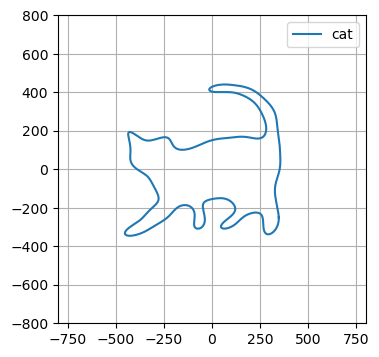

In [5]:
fig = plot_curve(C, title = 'The cat curve', label = 'cat')

In [6]:
def rot_matrix(angle):
    """ Matrix of rotation by a given angle."""
    theta = np.pi / 180 * angle
    A = np.array([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])
    return A

def reflection_x_matrix():
    """ Reflection about the x axis"""
    return np.array([[1,0],[0,-1]])

def reflection_matrix(angle):
    """ Reflection about axis with given angle rel. x-axis"""
    return rot_matrix(angle) @ reflection_x_matrix() @ rot_matrix(-angle)
    
def scale_matrix(alpha, beta):
    """ Scaling of x and y by alpha and beta, respectively."""
    return np.array([[alpha,0],[0,beta]])


ic| A: array([[ 1.,  0.],
              [ 0., -1.]])


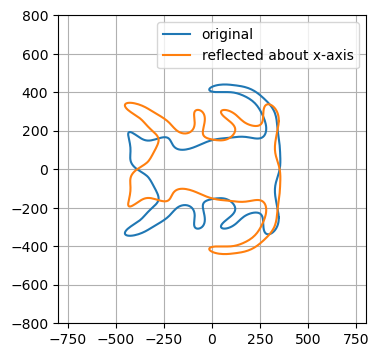

In [7]:
#
# Plot the reflection about the x axis.
#

A = reflection_matrix(0)
ic(A)

# note that A is applied to each COLUMN of C, i.e., each point on the curve
fig = plot_curve(C, label = 'original')
fig = plot_curve(A @ C, fig=fig, label='reflected about x-axis', title = 'Reflection of cat')

ic| A: array([[ 1.99673462e-16,  1.00000000e+00],
              [ 1.00000000e+00, -1.79380389e-16]])


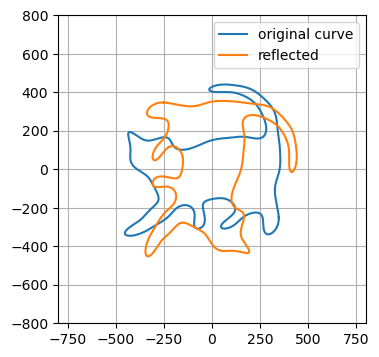

In [8]:
#
# Plot the reflection about the axis making a 45 degree angle with the x axis.
#

A = reflection_matrix(45)
ic(A)
# note that A is applied to each COLUMN of C, i.e., each point on the curve
fig = plot_curve(C, label = 'original curve')
fig = plot_curve(A @ C, fig = fig, label = 'reflected' )

Rotation matrix for angle 0.0 = 
[[ 1. -0.]
 [ 0.  1.]]
Rotation matrix for angle 15.0 = 
[[ 0.96592583 -0.25881905]
 [ 0.25881905  0.96592583]]
Rotation matrix for angle 30.0 = 
[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
Rotation matrix for angle 45.0 = 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


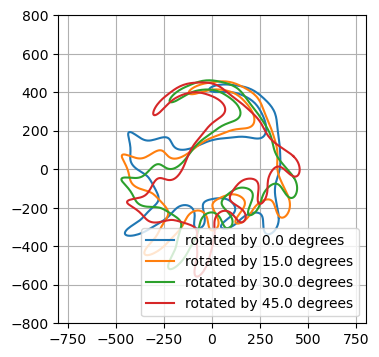

In [9]:
#
# Rotate the curve by a selection of angles
#

fig = plt.figure()
for angle in np.linspace(0,45,4):
    A = rot_matrix(angle)
    print(f'Rotation matrix for angle {angle} = ')
    print(A)
    fig = plot_curve(A @ C, fig=fig, label=f'rotated by {angle} degrees', title = 'Rotations')

Scaling matrix for angle 1.0 = 
[[1. 0.]
 [0. 1.]]
Scaling matrix for angle 0.8 = 
[[0.8 0. ]
 [0.  0.8]]
Scaling matrix for angle 0.6 = 
[[0.6 0. ]
 [0.  0.6]]
Scaling matrix for angle 0.3999999999999999 = 
[[0.4 0. ]
 [0.  0.4]]
Scaling matrix for angle 0.2 = 
[[0.2 0. ]
 [0.  0.2]]


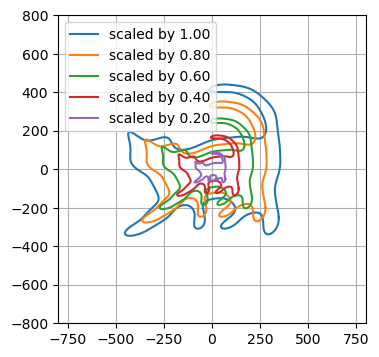

In [10]:
#
# Shrink the curve by a selection of uniform factors alpha = beta
#

fig = plt.figure()
for alpha in np.linspace(1,0.2,5):
    A = scale_matrix(alpha,alpha)
    print(f'Scaling matrix for angle {alpha} = ')
    print(A)
    fig = plot_curve(A @ C, fig=fig, label=f'scaled by {alpha:.02f}', title = 'Scaling')

A = 
[[ 1.00000000e+00 -7.43708407e-18]
 [-7.43708407e-18  1.00000000e+00]]
A = 
[[ 0.7        -0.17320508]
 [-0.17320508  0.9       ]]
A = 
[[ 0.4        -0.34641016]
 [-0.34641016  0.8       ]]


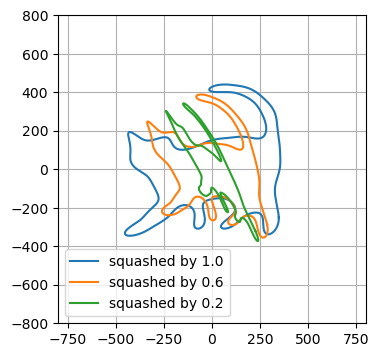

In [11]:
#
# Do some stretching in the direction 
# defined by 30 degrees relative to x axis
#
fig = plt.figure()
for alpha in np.linspace(1.0, 0.2, 3):
    A = rot_matrix(30) @ scale_matrix(alpha,1) @ rot_matrix(-30)
    print(f'A = ')
    print(A)
    fig = plot_curve(A @ C, fig=fig, label=f'squashed by {alpha}', title = 'Squashing along 30 degrees')